In [96]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Flatten,RandomRotation, RandomFlip
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [58]:
#Jeu de données pour classifier des images de peau --> cancer benign ou malignant
#X_test, X_train image en 128*128*1
#y_test, y_train coresponding category:  0 --> benign, 1 --> malignant

X_test = np.load('../data/x_test.npy')
y_test = np.load('../data/y_test.npy')
X_train = np.load('../data/x_train.npy')
y_train = np.load('../data/y_train.npy')

In [59]:
#Vérification des tailles des fichiers --> OK correspond à la doc
print("size X_test: ",X_test.shape)
print("size y_test: ",y_test.shape)
print("size X_train: ",X_train.shape)
print("size y_train: ",y_train.shape)

size X_test:  (120, 128, 128, 1)
size y_test:  (120, 2)
size X_train:  (2000, 128, 128, 1)
size y_train:  (2000, 2)


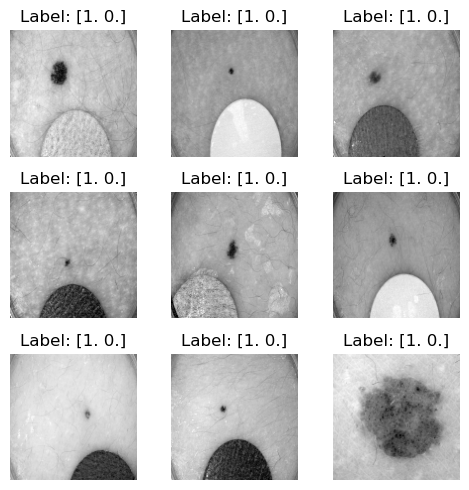

Valeur minimale de X_train : 0.0
Valeur maximale de X_train : 1.0000008


In [60]:
#Affichage d'un echantillon de la base
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#Observation des valeurs min et max de X_train pour check si besoin de normalisation
print("Valeur minimale de X_train :", np.min(X_train))
print("Valeur maximale de X_train :", np.max(X_train))

In [61]:
# Verification que y_test contient bien des valeurs diff et pas que des [0,1]

# Reconvertit en labels 0 ou 1
labels = np.argmax(y_train, axis=1)

# Affiche les classes présentes et leur nombre
unique_classes, counts = np.unique(labels, return_counts=True)
print("Classes trouvées :", unique_classes)
print("Nombre d'exemples par classe :", counts)

# --> les y semblent avoir déjà été traités par un OneHotEncoder qui a converti:
# 0 --> [1,0] benign
# 1 --> [0,1] malignant

Classes trouvées : [0 1]
Nombre d'exemples par classe : [1000 1000]


- size X_test:  (120, 128, 128, 1)
- size y_test:  (120, 2)
- size X_train:  (2000, 128, 128, 1)
- size y_train:  (2000, 2)  

Il y a 2000 images dans le jeu de train et 120 image dans celui de test.  
Les tailles des images sont en 128 x 128 x 1 (NB 1 seul canal)  
Elles ont toutes la même taille.  

X a déjà été normalisé --> valeur entre 0 et 1  
y --> a déjà été OneHotEncoder --> vecteur de dimension [nb_value, 2]

In [62]:
#Création d'un CNN
num_classes = 2
input_shape = (128,128,1)

#Rajout de couche dropout
model_CNN4 = Sequential([
    Input(shape=input_shape),
    Conv2D(32,kernel_size= (7,7) , padding='same', activation='relu'), 
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size= (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,kernel_size= (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_CNN4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN4.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = model_CNN4.fit(X_train, y_train, epochs=200, validation_split=0.1,batch_size = 64, callbacks=[early_stopping])
_, test_acc = model_CNN4.evaluate(X_test, y_test)
print(test_acc)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 128, 128, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 64, 64, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,329,538 (16.52 MB)

 Trainable params: 4,329,538 (16.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5161 - loss: 0.7077 - val_accuracy: 0.4000 - val_loss: 0.7083
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5447 - loss: 0.6721 - val_accuracy: 0.1150 - val_loss: 1.1757
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5902 - loss: 0.6347 - val_accuracy: 0.8100 - val_loss: 0.6537
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.5354 - loss: 0.6810 - val_accuracy: 0.1100 - val_loss: 1.3705
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6108 - loss: 0.6398 - val_accuracy: 0.4500 - val_loss: 1.0104
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6868 - loss: 0.5962 - val_accuracy: 0.1050 - val_loss: 1.3671
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.6583 - loss: 0.6183 - val_accuracy: 0.5650 - val_loss: 0.9369
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6788 - loss: 0.5884 - val_accuracy: 0

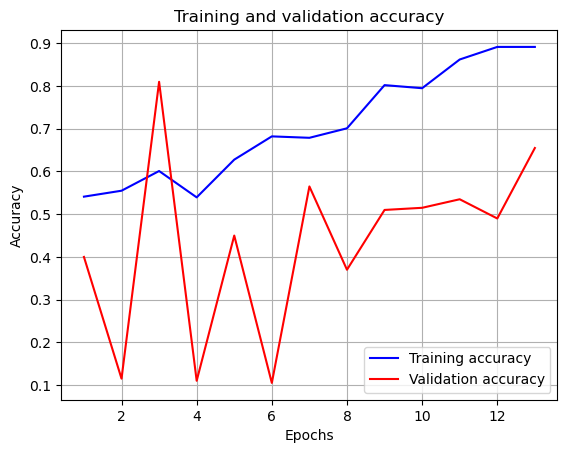

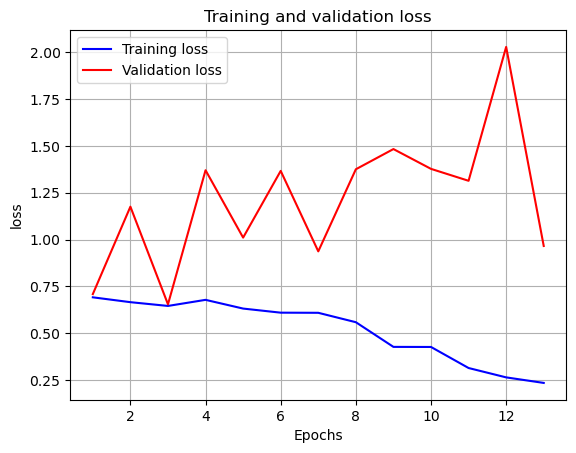

In [63]:
# Accès aux métriques stockées pendant l'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Tracer les courbes
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visualize training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Tracer les courbes
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 128, 128, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 64, 64, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,329,538 (16.52 MB)

 Trainable params: 4,329,538 (16.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.5215 - loss: 0.7690 - val_accuracy: 0.1100 - val_loss: 0.7217
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5480 - loss: 0.6882 - val_accuracy: 0.1100 - val_loss: 0.7121
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5326 - loss: 0.6910 - val_accuracy: 0.1100 - val_loss: 0.7607
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5333 - loss: 0.6902 - val_accuracy: 0.1100 - val_loss: 0.7214
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5448 - loss: 0.6877 - val_accuracy: 0.1100 - val_loss: 0.7306
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5501 - loss: 0.6857 - val_accuracy: 0.1100 - val_loss: 0.7973
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5375 - loss: 0.6855 - val_accuracy: 0.1100 - val_loss: 0.7493
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5561 - loss: 0.6784 - val_accura

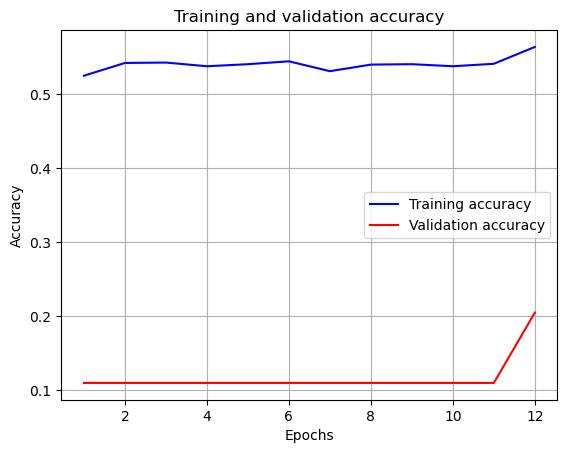

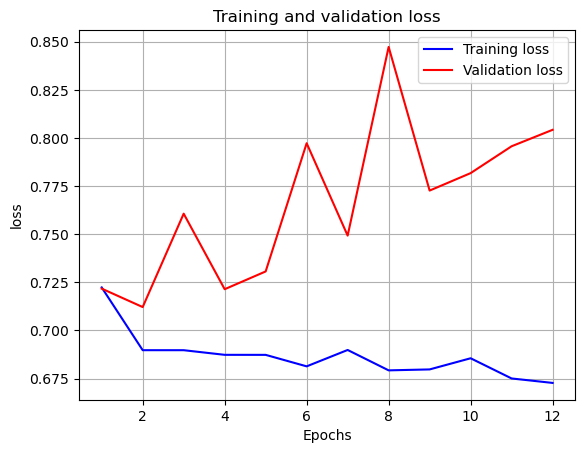

In [ ]:
# Avec Dropout
# Création d'un CNN
num_classes = 2
input_shape = (128,128,1)

# Rajout de couche dropout
model_CNN4 = Sequential([
    Input(shape=input_shape),
    Conv2D(32,kernel_size= (7,7) , padding='same', activation='relu'), 
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64,kernel_size= (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(128,kernel_size= (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_CNN4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN4.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = model_CNN4.fit(X_train, y_train, epochs=200, validation_split=0.1,batch_size = 64, callbacks=[early_stopping])
_, test_acc = model_CNN4.evaluate(X_test, y_test)
print(test_acc)

# Accès aux métriques stockées pendant l'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Tracer les courbes
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visualize training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Tracer les courbes
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_20 (Sequential)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 128, 128, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 64, 64, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,329,538 (16.52 MB)

 Trainable params: 4,329,538 (16.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5127 - loss: 0.8567 - val_accuracy: 0.1100 - val_loss: 0.7617
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5483 - loss: 0.6971 - val_accuracy: 0.1100 - val_loss: 0.7745
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5527 - loss: 0.6837 - val_accuracy: 0.1100 - val_loss: 0.8431
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5401 - loss: 0.6880 - val_accuracy: 0.1100 - val_loss: 1.1019
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5100 - loss: 0.7032 - val_accuracy: 0.1100 - val_loss: 1.0974
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5322 - loss: 0.7082 - val_accuracy: 0.1100 - val_loss: 0.8285
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5567 - loss: 0.6804 - val_accuracy: 0.5800 - val_loss: 0.7128
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.5182 - loss: 0.6954 - val_accuracy: 0.

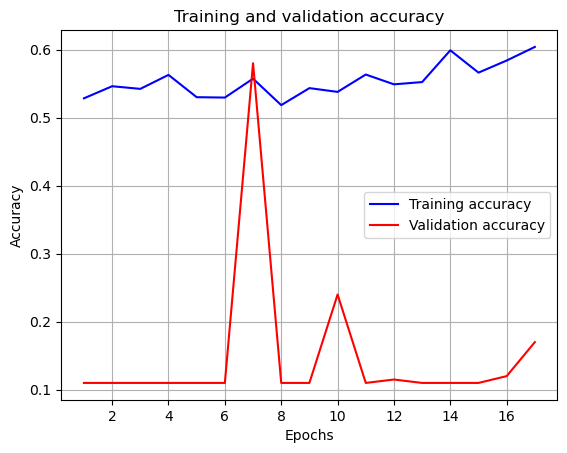

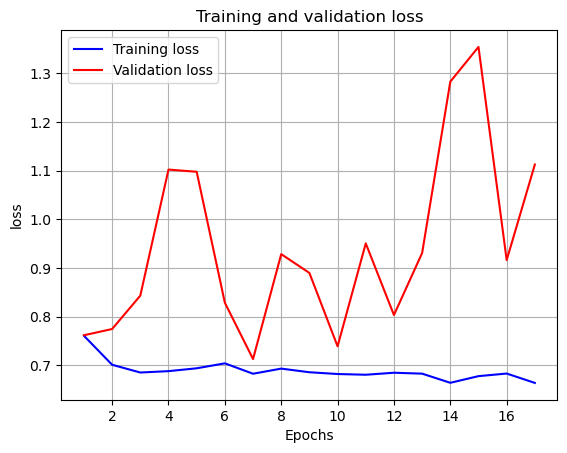

In [65]:
#En augmentant le jeu de donnée + no Dropout
#Création d'un CNN
num_classes = 2
input_shape = (128,128,1)

# Pipeline pour aggrandissement du jeu de donnée via flip / rotation aleatoire
data_augmentation = Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

#Rajout de couche dropout
model_CNN4 = Sequential([
    Input(shape=input_shape),
    data_augmentation,
    Conv2D(32,kernel_size= (7,7) , padding='same', activation='relu'), 
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size= (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,kernel_size= (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_CNN4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN4.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = model_CNN4.fit(X_train, y_train, epochs=200, validation_split=0.1,batch_size = 64, callbacks=[early_stopping])
_, test_acc = model_CNN4.evaluate(X_test, y_test)
print(test_acc)

# Accès aux métriques stockées pendant l'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Tracer les courbes
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visualize training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Tracer les courbes
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 128, 128, 32)   │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 64, 64, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,329,538 (16.52 MB)

 Trainable params: 4,329,538 (16.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5164 - loss: 0.7939 - val_accuracy: 0.1100 - val_loss: 0.7018
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5580 - loss: 0.6907 - val_accuracy: 0.1100 - val_loss: 0.7086
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5684 - loss: 0.6897 - val_accuracy: 0.1100 - val_loss: 0.8152
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5436 - loss: 0.6928 - val_accuracy: 0.1100 - val_loss: 0.7331
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5438 - loss: 0.6881 - val_accuracy: 0.1100 - val_loss: 0.7278
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5368 - loss: 0.6875 - val_accuracy: 0.1100 - val_loss: 0.8522
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5491 - loss: 0.6800 - val_accuracy: 0.1100 - val_loss: 0.8083
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5563 - loss: 0.6936 - val_accu

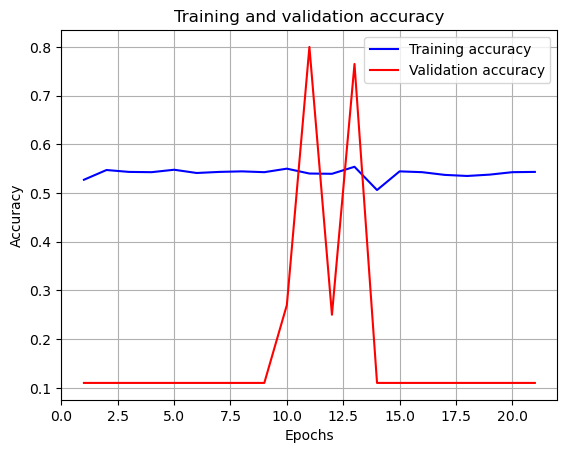

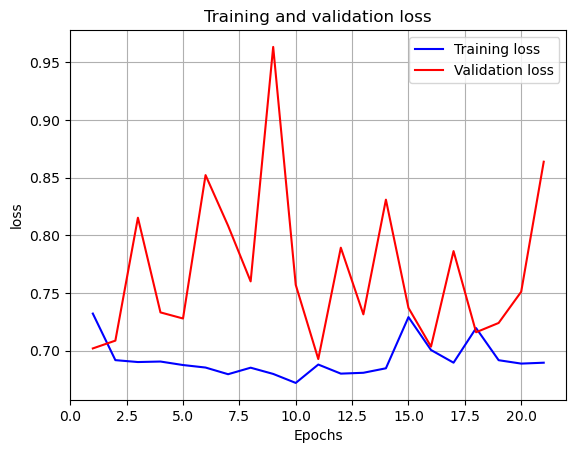

In [66]:
#En augmentant le jeu de donnée + Avec Dropout
#Création d'un CNN
num_classes = 2
input_shape = (128,128,1)

# Pipeline pour aggrandissement du jeu de donnée via flip / rotation aleatoire
data_augmentation = Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

#Rajout de couche dropout
model_CNN4 = Sequential([
    Input(shape=input_shape),
    data_augmentation,
    Conv2D(32,kernel_size= (7,7) , padding='same', activation='relu'), 
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64,kernel_size= (5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(128,kernel_size= (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_CNN4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_CNN4.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history = model_CNN4.fit(X_train, y_train, epochs=200, validation_split=0.1,batch_size = 64, callbacks=[early_stopping])
_, test_acc = model_CNN4.evaluate(X_test, y_test)
print(test_acc)

# Accès aux métriques stockées pendant l'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Tracer les courbes
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visualize training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Tracer les courbes
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [78]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

img = load_img('../data/cat.jpg', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [79]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n03085013', 'computer_keyboard', np.float32(0.288339)), ('n03793489', 'mouse', np.float32(0.22849661)), ('n03180011', 'desktop_computer', np.float32(0.18453889))]


In [77]:
img = load_img('../data/cat_2.jpg', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Top 3 : [('n04442312', 'toaster', np.float32(0.31720167)), ('n04004767', 'printer', np.float32(0.08720932)), ('n04553703', 'washbasin', np.float32(0.06812056))]


In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

img = load_img('../data/cat.jpg', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img) 
print(img.shape)

model2 = MobileNetV2() 
y = model2.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
# Afficher les 3 classes les plus probables
print('MobileNetv2 Top 3 :', decode_predictions(y, top=3)[0])

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
MobileNetv2 Top 3 : [('n03627232', 'knot', np.float32(0.16718724)), ('n04589890', 'window_screen', np.float32(0.03903329)), ('n02098286', 'West_Highland_white_terrier', np.float32(0.032698322))]


In [ ]:
from keras.applications.inception_v3 import InceptionV3

img = load_img('../data/cat.jpg', target_size=(299, 299))  # Charger l'image ATTENTION INCEPTION --> 299, 299
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1,img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
print(img.shape)
img = preprocess_input(img)  

model3 = InceptionV3()
y = model3.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
# Afficher les 3 classes les plus probables
print('InceptionV3 Top 3 :', decode_predictions(y, top=3)[0])

(1, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step
InceptionV3 Top 3 : [('n06359193', 'web_site', np.float32(1.0)), ('n04328186', 'stopwatch', np.float32(4.6270317e-19)), ('n03481172', 'hammer', np.float32(1.14568085e-20))]


TRANSFER LEARNING

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras import Model
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output
x = Flatten()(x) #--> doit convertir en vecteur avant d'envoyer sur les couches fully-connected

# Ajouter la nouvelle couche fully-connected pour la classification à 2 classes
predictions = Dense(2, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

In [ ]:
# Préparation des données (redimensionnement aux dimensions attendues par VGG16)

# Resize à (224, 224)
X_train_resized = tf.image.resize(X_train, [224, 224])  # toujours (2000, 224, 224, 1)
X_test_resized = tf.image.resize(X_test, [224, 224])

# Convertir 1 canal -> 3 canaux en dupliquant
X_train_conv = tf.image.grayscale_to_rgb(X_train_resized) # forme finale: (2000, 224, 224, 3)
X_test_conv = tf.image.grayscale_to_rgb(X_test_resized)  

# # Optionnel : convertir en np.array si besoin
# X_train_conv = X_test_rgb.numpy()

#verification bonne conversion
print("Forme originale :", X_train.shape)  # (2000, 128, 128, 1)
print("Nouvelle forme :", X_train_conv.shape)  # (2000, 224, 224, 3)

Forme originale : (2000, 128, 128, 1)
Nouvelle forme : (2000, 224, 224, 3)


In [104]:
### !!!!! Ne pas executer trop long !!!!! ###

# # Strat 1: fine tuning total --> entraine tout le reseau, il faut rendre toutes les couches entrainables

# for layer in model.layers:
#    layer.trainable = True

# # Compiler le modèle 
# new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Entraîner sur les données d'entraînement (X_train, y_train)
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
# model_info = new_model.fit(X_train_conv, y_train, epochs=200, batch_size=64, verbose=2,validation_split=0.1, callbacks=[early_stopping])

# _, test_acc = new_model.evaluate(X_test_conv, y_test)
# print(test_acc)

In [111]:
# # Strat 2: Extraction de feature --> entraine seulement le new classifieur et on ne ré-entraine pas les autres couches

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output
x = Flatten()(x) #--> doit convertir en vecteur avant d'envoyer sur les couches fully-connected

# Ajouter la nouvelle couche fully-connected pour la classification à 2 classes
predictions = Dense(2, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

for layer in model.layers: #Rq ici c'est bien model.layers donc ne touche pas les layers rajoutés pour new_model (le dense et flatten)
   layer.trainable = False

# Compiler le modèle 
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner sur les données d'entraînement (X_train, y_train)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
model_info0 = new_model.fit(X_train_conv, y_train, epochs=200, batch_size=64, verbose=2,validation_split=0.1, callbacks=[early_stopping])

_, test_acc = new_model.evaluate(X_test_conv, y_test)
print(test_acc)

Epoch 1/200
29/29 - 30s - 1s/step - accuracy: 0.6906 - loss: 0.6648 - val_accuracy: 0.4600 - val_loss: 1.4031
Epoch 2/200
29/29 - 29s - 1s/step - accuracy: 0.8711 - loss: 0.3076 - val_accuracy: 0.5450 - val_loss: 1.1775
Epoch 3/200
29/29 - 29s - 1s/step - accuracy: 0.9028 - loss: 0.2583 - val_accuracy: 0.4800 - val_loss: 1.3342
Epoch 4/200
29/29 - 29s - 993ms/step - accuracy: 0.9128 - loss: 0.2319 - val_accuracy: 0.5700 - val_loss: 1.1182
Epoch 5/200
29/29 - 28s - 980ms/step - accuracy: 0.9183 - loss: 0.2156 - val_accuracy: 0.5850 - val_loss: 1.1009
Epoch 6/200
29/29 - 28s - 970ms/step - accuracy: 0.9200 - loss: 0.2063 - val_accuracy: 0.7100 - val_loss: 0.7693
Epoch 7/200
29/29 - 28s - 966ms/step - accuracy: 0.9228 - loss: 0.1968 - val_accuracy: 0.5750 - val_loss: 1.2067
Epoch 8/200
29/29 - 28s - 971ms/step - accuracy: 0.9278 - loss: 0.1795 - val_accuracy: 0.6550 - val_loss: 0.9756
Epoch 9/200
29/29 - 28s - 968ms/step - accuracy: 0.9378 - loss: 0.1698 - val_accuracy: 0.5650 - val_loss:

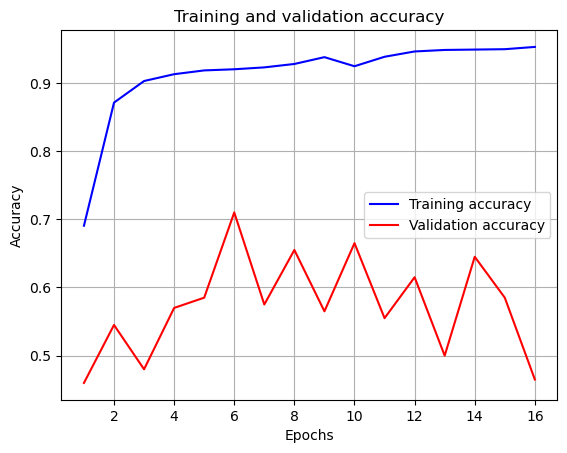

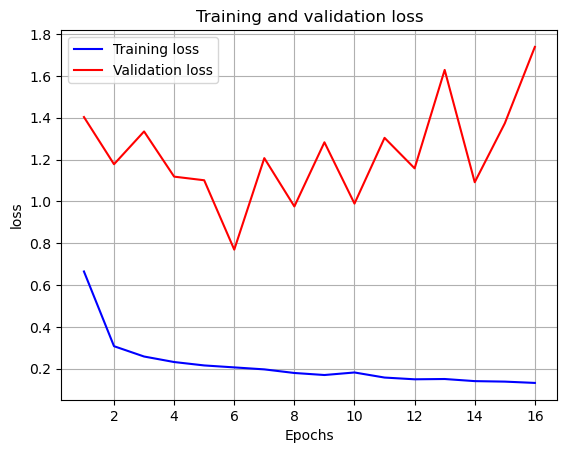

In [112]:
# Accès aux métriques stockées pendant l'entraînement
acc = model_info0.history['accuracy']
val_acc = model_info0.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Tracer les courbes
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visualize training and validation losses
loss = model_info0.history['loss']
val_loss = model_info0.history['val_loss']
epochs = range(1, len(loss) + 1)

# Tracer les courbes
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# # Strat 3: fine-tuning partiel --> On entraîne le nouveau classifieur et les couches hautes

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model2 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model2.output
x = Flatten()(x) #--> doit convertir en vecteur avant d'envoyer sur les couches fully-connected

# Ajouter la nouvelle couche fully-connected pour la classification à 2 classes
predictions2 = Dense(2, activation='softmax')(x)

# Définir le nouveau modèle
new_model2 = Model(inputs=model2.input, outputs=predictions2)

# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in model2.layers[:5]:
   layer.trainable = False

# Compiler le modèle 
new_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner sur les données d'entraînement (X_train, y_train)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_info = new_model2.fit(X_train_conv, y_train, epochs=200, batch_size=64, verbose=2,validation_split=0.1, callbacks=[early_stopping])

_, test_acc = new_model2.evaluate(X_test_conv, y_test)
print(test_acc)

Epoch 1/200
29/29 - 72s - 2s/step - accuracy: 0.5022 - loss: 0.9617 - val_accuracy: 0.1100 - val_loss: 0.7951
Epoch 2/200
29/29 - 70s - 2s/step - accuracy: 0.5433 - loss: 0.6933 - val_accuracy: 0.1100 - val_loss: 0.7138
Epoch 3/200
29/29 - 68s - 2s/step - accuracy: 0.5306 - loss: 0.7014 - val_accuracy: 0.7850 - val_loss: 0.6703
Epoch 4/200
29/29 - 70s - 2s/step - accuracy: 0.5306 - loss: 0.7094 - val_accuracy: 0.1100 - val_loss: 0.8254
Epoch 5/200
29/29 - 69s - 2s/step - accuracy: 0.6067 - loss: 0.6656 - val_accuracy: 0.4250 - val_loss: 0.9239
Epoch 6/200
29/29 - 69s - 2s/step - accuracy: 0.6933 - loss: 0.5841 - val_accuracy: 0.1950 - val_loss: 1.5016
Epoch 7/200
29/29 - 68s - 2s/step - accuracy: 0.5994 - loss: 0.6507 - val_accuracy: 0.1100 - val_loss: 0.8953
Epoch 8/200
29/29 - 68s - 2s/step - accuracy: 0.5322 - loss: 1.2954 - val_accuracy: 0.4750 - val_loss: 1.0463
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/ste

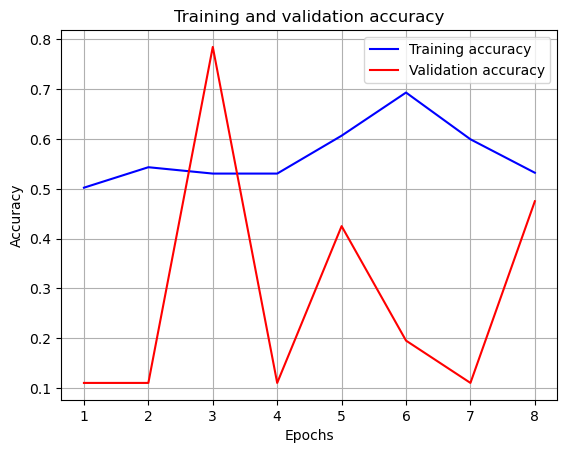

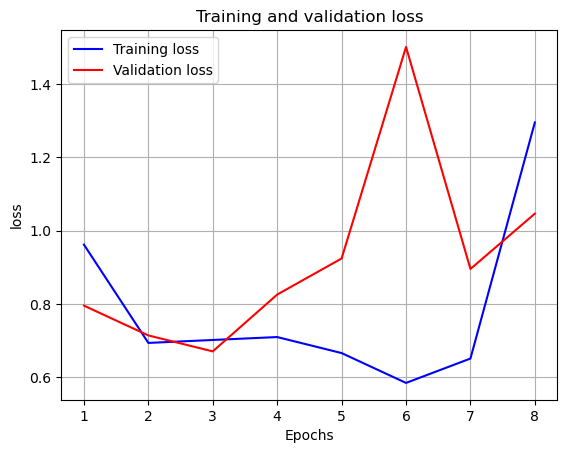

In [110]:
# Accès aux métriques stockées pendant l'entraînement
acc = model_info.history['accuracy']
val_acc = model_info.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Tracer les courbes
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visualize training and validation losses
loss = model_info.history['loss']
val_loss = model_info.history['val_loss']
epochs = range(1, len(loss) + 1)

# Tracer les courbes
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()